# data processing

convert the raw data to the data we can put into dashborad construction

## can be done

Remove Null Values by replacing with suitable number​

Encode categorical variables into numerical variables​

Normalize and scale features​

Remove Children that appear more than once 

re-lable classid

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 

In [3]:
# data loading

def import_excel(file_path):
  # Load the Excel file
  xls = pd.ExcelFile(file_path)

  # Create a dictionary to store DataFrames
  dataframe = {}

  # Iterate through each sheet in the Excel file
  for sheet_name in xls.sheet_names:
      # Read each sheet into a DataFrame
      df = pd.read_excel(file_path, sheet_name=sheet_name)
      # Store the DataFrame with the sheet name as the key in the dictionary
      dataframe[sheet_name] = df
  return dataframe

# Now you have a dictionary where each key is the sheet name, and the value is the corresponding DataFrame
# For example, to access the DataFrame for the sheet named 'Sheet1':

# df_nigeria: basic info about nigeria dataset
# df_nigeria_add: contains sel data
df_nigeria = import_excel(r'Nigeria CuC Data - 2024 10 08.xlsx')
print("df_nigeria sheets " + str(df_nigeria.keys()))
df_nigeria_add = import_excel(r'Nigeria-Additional Data - 2024 10 15.xlsx')
print("df_nigeria_add sheets " + str(df_nigeria_add.keys()))

# loop through the dictionary and convert to dataframe



df_nigeria sheets dict_keys(['_fact_student_attendance', 'Note', '_fact_classes', '_dim_students', '_fact_reading_result', '_fact_student_reporting_rate'])
df_nigeria_add sheets dict_keys(['Literacy'])


In [4]:
# df_nigeria
df_classes = df_nigeria['_fact_classes']

# df_nigeria_add
df_sel = df_nigeria_add['Literacy']
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86998 entries, 0 to 86997
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   86998 non-null  int64  
 1   AcademicYearName                                 86998 non-null  object 
 2   SchoolId                                         86998 non-null  int64  
 3   ClassId                                          86998 non-null  int64  
 4   ChildrenId                                       86998 non-null  int64  
 5   DeleteReasonId                                   593 non-null    float64
 6   CommunicationIssue                               41749 non-null  object 
 7   MemoryConcentration                              41749 non-null  object 
 8   Hearing                                          41749 non-null  object 
 9   Vision                      

In [5]:
# contains 86998 child - only 10228 have sel data
df_sel = df_sel[df_sel['SELMatrix_Get_along_with_people'].notnull()]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10228 entries, 66477 to 86997
Data columns (total 65 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   10228 non-null  int64  
 1   AcademicYearName                                 10228 non-null  object 
 2   SchoolId                                         10228 non-null  int64  
 3   ClassId                                          10228 non-null  int64  
 4   ChildrenId                                       10228 non-null  int64  
 5   DeleteReasonId                                   0 non-null      float64
 6   CommunicationIssue                               10228 non-null  object 
 7   MemoryConcentration                              10228 non-null  object 
 8   Hearing                                          10228 non-null  object 
 9   Vision                       

In [6]:
has_duplicates = df_sel['ChildrenId'].duplicated().any()
# has_duplicates np.True_ 

df_duplicates = df_sel[df_sel['ChildrenId'].duplicated(keep=False)]
df_duplicates
#df_duplicates cycle - typo - delete

,AcademicYearId,AcademicYearName,SchoolId,ClassId,ChildrenId,DeleteReasonId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,IsCUCSatisfied?,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,skills_abilities,compare_others,life_goal,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,other_social_effects,other_psychological_effects,student_identity_type,student_identity_no,PrimaryCareGiver,PrimaryCareGiverOther,PrimaryCareGiverOtherRelation,BirthOrder,BirthOrderOther,HomeLanguage,HomeLanguageOther,Year,Cycle,Project
82583,9,2024-CuC & VYA-Cycle 1,134,292,17137,NaN,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 4,NaN,12.0,Female,1-3_months_ago,No,No,No,No,6.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,1.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,Birth_Certificate,0,Father,NaN,NaN,6,NaN,Hausa,NaN,2024,1,Plane
83811,9,2024-CuC & VYA-Cycle 1,134,292,17137,NaN,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,No,No,No,Grade 3,NaN,12.0,Female,1-3_months_ago,No,No,No,No,8.0,NaN,NaN,NaN,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,A_lot,1.0,1.0,1.0,1.0,1.0,0.0,NaN,NaN,Not_Available,NaN,Father,NaN,NaN,6,NaN,Hausa,NaN,2024,1,Plane


In [7]:
df_sel = df_sel.drop(df_duplicates.index)
df_sel = df_sel.dropna(axis=1, how='all')
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10226 entries, 66477 to 86997
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   10226 non-null  int64  
 1   AcademicYearName                                 10226 non-null  object 
 2   SchoolId                                         10226 non-null  int64  
 3   ClassId                                          10226 non-null  int64  
 4   ChildrenId                                       10226 non-null  int64  
 5   CommunicationIssue                               10226 non-null  object 
 6   MemoryConcentration                              10226 non-null  object 
 7   Hearing                                          10226 non-null  object 
 8   Vision                                           10226 non-null  object 
 9   Selfcare                     

If a person skips or misses an item, their scores should not be automatically computed, as their overall score will be artificially lower than others who complete the measure. If this happens, you can discard the incomplete result or consider methods of managing missing data

### SCORING：

#### total score of an individual’s resilience

the items within the measures can be directly summed. For an unmodified 3-point measure, the minimum score is 17 and the maximum score is 51.

#### Personal Resilience Subscale Scores

sum 10 items: 1, 2, 3, 7, 9, 10, 12, 13, 14, 16. 

#### Caregiver/Relational Resilience Subscale Scores

sum 7 items: 4, 5, 6, 8, 11, 15, 17. 

### EVALUATING METHODS

#### indication

For the overall measure and subscales, higher scores indicate characteristics associated with stronger resilience."

#### comparing differences
"We recommend *comparing high scorers to low scorers* and investigating *potential reasons* for these differences. You may wish to *rank your sample by score* and *contrast the top half of scorers against the lower half* to determine what might account for these differences.

#### categorical analysis
consider that individuals scoring greater than one standard deviation above your sample average have *‘higher resilience’*, those between one standard deviation above and below the average have *‘moderate resilience’*, and those below one standard deviation have *‘low resilience’*.

In [58]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10226 entries, 66477 to 86997
Data columns (total 63 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   AcademicYearId                                   10226 non-null  int64  
 1   AcademicYearName                                 10226 non-null  object 
 2   SchoolId                                         10226 non-null  int64  
 3   ClassId                                          10226 non-null  int64  
 4   ChildrenId                                       10226 non-null  int64  
 5   CommunicationIssue                               10226 non-null  object 
 6   MemoryConcentration                              10226 non-null  object 
 7   Hearing                                          10226 non-null  object 
 8   Vision                                           10226 non-null  object 
 9   Selfcare                     

In [ ]:
df_sel.fillna("Unknown", inplace=True)

In [8]:
df_sel.columns

Index(['AcademicYearId', 'AcademicYearName', 'SchoolId', 'ClassId',
       'ChildrenId', 'CommunicationIssue', 'MemoryConcentration', 'Hearing',
       'Vision', 'Selfcare', 'Walking/Climbing', 'IsElectricityAvailable?',
       'IsRadioTVAvailable?', 'IsTelephoneAvailable?', 'ChildrenGrade',
       'ChildrenAge', 'ChildrenGender', 'OOSC_Child', 'HasTelevision',
       'IsBikeAvailable?', 'IsOx-cartAvailable?', 'HasMotorcycle',
       'self_esteem_life_skills', 'skills_abilities', 'compare_others',
       'life_goal', 'SELMatrix_Get_along_with_people',
       'SELMatrix_Educations_is_important',
       'SELMatrix_Behave_in_different_situations',
       'SELMatrix_Parents_caregiver_take_care',
       'SELMatrix_Parents_caregiver_know_a_lot_about_me', 'SELMatrix_Hungry',
       'SELMatrix_People_like_to_spend_time_with_me',
       'SELMatrix_Talk_to_family_when_feelings', 'SELMatrix_Friends_support',
       'SELMatrix_Get_along_at_school',
       'SELMatrix_Parents_caregiver_care_to_me',


In [9]:
# use two types of scoring
df_sel['SELMatrix_Get_along_with_people'].unique()

array(['Yes', 'Sometimes', 'No', 'A_lot', 'Quite_a_bit', 'A_little',
       'Somewhat', 'Not_at_all'], dtype=object)

In [11]:
df_sel['OOSC_Child'].unique()

array([nan, 'Was in school 1-3 months ago',
       'Was in school 7-9 months ago', 'Never went to school',
       'Was in school less than 1 month ago',
       'Was in school 4-6 months ago', 'Was in school 10-12 months ago',
       '4-6_months_ago', '1-3_months_ago', '7-9_months_ago',
       '1_month_ago', '10-12_months_ago', 'Never_went_to_school'],
      dtype=object)

In [31]:
# class_id change
import re
df_classes['simplified_name'] = df_classes['ClassName'].apply(lambda x: re.sub(r' Cluster \d+', '', x))

unique_simplified_names = df_classes['simplified_name'].unique()
simplified_to_newclassid = {name: idx for idx, name in enumerate(unique_simplified_names)}

df_classes['newclassid'] = df_classes['simplified_name'].map(simplified_to_newclassid)
classid_to_newclassid = dict(zip(df_classes['ClassID'], df_classes['newclassid']))

In [50]:
three_scoring = ['Yes', 'Sometimes', 'No']
five_scoring = ['A_lot', 'Quite_a_bit', 'A_little', 'Somewhat', 'Not_at_all']
df_sel_three_scoring = df_sel[df_sel['SELMatrix_Get_along_with_people'].isin(three_scoring)]
df_sel_five_scoring = df_sel[df_sel['SELMatrix_Get_along_with_people'].isin(five_scoring)]

In [51]:
skip_column = ['Project', 'Cycle', 'AcademicYearName', 'other_social_effects', 'other_psychological_effects', 'student_identity_no', 'PrimaryCareGiverOther', 'PrimaryCareGiverOtherRelation', 'BirthOrderOther', 'HomeLanguageOther']

difficulty_column = ['CommunicationIssue', 'MemoryConcentration', 'Hearing', 'Vision', 'Selfcare', 'Walking/Climbing']
binary_column = ['IsElectricityAvailable?', 'IsRadioTVAvailable?', 'IsTelephoneAvailable?','HasTelevision',
    'IsBikeAvailable?', 'IsOx-cartAvailable?', 'HasMotorcycle']

difficulty_dict = {'no_difficulty': 0, 'some_difficulty':1, 'lot_difficulty':2,'Cannot_do_at_all':3}
binary_dict = {'No':0, 'Yes':1, "Don't_know":2}
grade_dict = {'Grade 3':3, 'Grade 2':2, 'Grade 1':1, 'Grade 7':7, 'Grade 5':5, 'Grade 6':6,
    'Grade 4':4, 'Unknown':0, 'Grade 8':8, 'Grade 10':10}
gender_dict = {'Female':0, 'Male':1}
oosc_dict = {
    "Was in school 1-3 months ago": "1-3 months ago",
    "Was in school 7-9 months ago": "7-9 months ago",
    "Never went to school": "Never went to school",
    "Was in school less than 1 month ago": "1 month ago",
    "Was in school 4-6 months ago": "4-6 months ago",
    "Was in school 10-12 months ago": "10-12 months ago",
    "4-6_months_ago": "4-6 months ago",
    "1-3_months_ago": "1-3 months ago",
    "7-9_months_ago": "7-9 months ago",
    "1_month_ago": "1 month ago",
    "10-12_months_ago": "10-12 months ago",
    "Never_went_to_school": "Never went toschool"
}
birth_dict = {'other_birthorder':0}
identity_dict = {'Not_Available':0, 'Birth_Certificate':1, 'NIN':2}

categorical_column = ['SELMatrix_Get_along_with_people',
    'SELMatrix_Educations_is_important',
    'SELMatrix_Behave_in_different_situations',
    'SELMatrix_Parents_caregiver_take_care',
    'SELMatrix_Parents_caregiver_know_a_lot_about_me', 'SELMatrix_Hungry',
    'SELMatrix_People_like_to_spend_time_with_me',
    'SELMatrix_Talk_to_family_when_feelings', 'SELMatrix_Friends_support',
    'SELMatrix_Get_along_at_school',
    'SELMatrix_Parents_caregiver_care_to_me',
    'SELMatrix_Friends_care_about_me',
    'SELMatrix_Treat_fairly_at_community',
    'SELMatrix_Chance_to_show_the_growth',
    'SELMatrix_Feel_safe_with_family', 'SELMatrix_Chance_to_learn',
    'SELMatrix_likely_to_celebrate']
three_level_dict = {'Yes':float(3), 'Sometimes':float(2), 'No':float(1)}
five_level_dict = {'A_lot': 5 , 'Quite_a_bit': 4 , 'A_little': 3 , 'Somewhat': 2 , 'Not_at_all': 1}


In [52]:
# five_scoring - '2024-CuC & VYA-Cycle 1'
df_sel_five_scoring = df_sel_five_scoring.drop(columns=skip_column)
df_sel_five_scoring = df_sel_five_scoring.dropna(axis=1, how='all')
df_sel_five_scoring['BirthOrder'] = df_sel_five_scoring['BirthOrder'].replace(birth_dict).infer_objects()
df_sel_five_scoring['OOSC_Child'] = df_sel_five_scoring['OOSC_Child'].replace(oosc_dict).infer_objects()
# df_sel_five_scoring[difficulty_column] = df_sel_five_scoring[difficulty_column].replace(difficulty_dict).infer_objects()
df_sel_five_scoring[binary_column] = df_sel_five_scoring[binary_column].replace(binary_dict).infer_objects()
df_sel_five_scoring['ChildrenGrade'] = df_sel_five_scoring['ChildrenGrade'].replace(grade_dict).infer_objects()
df_sel_five_scoring['ChildrenGender'] = df_sel_five_scoring['ChildrenGender'].replace(gender_dict).infer_objects()
df_sel_five_scoring[categorical_column] = df_sel_five_scoring[categorical_column].replace(five_level_dict).infer_objects()
df_sel_five_scoring['student_identity_type'] = df_sel_five_scoring['student_identity_type'].replace(identity_dict).infer_objects()
df_sel_five_scoring['sel_total'] = df_sel_five_scoring[categorical_column].sum(axis=1)
df_sel_five_scoring['ClassId'] = df_sel_five_scoring['ClassId'].map(classid_to_newclassid)

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/2792515449.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_five_scoring['BirthOrder'] = df_sel_five_scoring['BirthOrder'].replace(birth_dict).infer_objects()
/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/2792515449.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_five_scoring[binary_column] = df_sel_five_scoring[binary_column].replace(binary_dict).infer_objects()
/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/

In [53]:
df_sel_three_vya = df_sel_three_scoring[df_sel_three_scoring['AcademicYearName'] == '2024-CuC & VYA-Cycle2']
df_sel_three = df_sel_three_scoring[df_sel_three_scoring['AcademicYearName'] == '2024-CuC-Cycle2']

In [54]:
# df_sel_three_vya - include sel teaching
df_sel_three_vya = df_sel_three_vya.drop(columns=skip_column)
df_sel_three_vya['OOSC_Child'] = df_sel_three_vya['OOSC_Child'].replace(oosc_dict).infer_objects()
df_sel_three_vya = df_sel_three_vya.dropna(axis=1, how='all')
df_sel_three_vya['BirthOrder'] = df_sel_three_vya['BirthOrder'].replace(birth_dict).infer_objects()
# df_sel_three_vya[difficulty_column] = df_sel_three_vya[difficulty_column].replace(difficulty_dict).infer_objects()
df_sel_three_vya['ChildrenGrade'] = df_sel_three_vya['ChildrenGrade'].replace(grade_dict).infer_objects()
df_sel_three_vya['ChildrenGender'] = df_sel_three_vya['ChildrenGender'].replace(gender_dict).infer_objects()
df_sel_three_vya[categorical_column] = df_sel_three_vya[categorical_column].replace(three_level_dict).infer_objects()
df_sel_three_vya['sel_total'] = df_sel_three_vya[categorical_column].sum(axis=1)
df_sel_three_vya['ClassId'] = df_sel_three_vya['ClassId'].map(classid_to_newclassid)

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/2836306050.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_three_vya['BirthOrder'] = df_sel_three_vya['BirthOrder'].replace(birth_dict).infer_objects()
/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/2836306050.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sel_three_vya['ChildrenGrade'] = df_sel_three_vya['ChildrenGrade'].replace(grade_dict).infer_objects()
/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/283630605

In [55]:
# df_sel_three - not include sel teaching
df_sel_three = df_sel_three.drop(columns=skip_column)
df_sel_three = df_sel_three.dropna(axis=1, how='all')
df_sel_three['OOSC_Child'] = df_sel_three['OOSC_Child'].replace(oosc_dict).infer_objects()
mean_age = df_sel_three['ChildrenAge'].mean()
df_sel_three['ChildrenAge'].fillna(mean_age, inplace=True)
df_sel_three['BirthOrder'] = df_sel_three['BirthOrder'].replace(birth_dict).infer_objects()
# df_sel_three[difficulty_column] = df_sel_three[difficulty_column].replace(difficulty_dict).infer_objects()
df_sel_three['ChildrenGrade'] = df_sel_three['ChildrenGrade'].replace(grade_dict).infer_objects()
df_sel_three['ChildrenGender'] = df_sel_three['ChildrenGender'].replace(gender_dict).infer_objects()
df_sel_three[categorical_column] = df_sel_three[categorical_column].replace(three_level_dict).infer_objects()
df_sel_three['sel_total'] = df_sel_three[categorical_column].sum(axis=1)
df_sel_three['ClassId'] = df_sel_three['ClassId'].map(classid_to_newclassid)

/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/2315270457.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_sel_three['ChildrenAge'].fillna(mean_age, inplace=True)
/var/folders/m8/9fp1qzgn03q4jkyhszq4mw_w0000gn/T/ipykernel_88999/2315270457.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [56]:
df_sel_five_scoring['sel_total'] = df_sel_five_scoring[categorical_column].sum(axis=1)
df_sel_three['sel_total'] = df_sel_three[categorical_column].sum(axis=1)
df_sel_three_vya['sel_total'] = df_sel_three_vya[categorical_column].sum(axis=1)

combined_df = pd.concat([df_sel_five_scoring, df_sel_three, df_sel_three_vya], ignore_index=True)

combined_df.to_csv('nigeria_sel_score.csv', index=False)

In [57]:
combined_df

,AcademicYearId,SchoolId,ClassId,ChildrenId,CommunicationIssue,MemoryConcentration,Hearing,Vision,Selfcare,Walking/Climbing,IsElectricityAvailable?,IsRadioTVAvailable?,IsTelephoneAvailable?,ChildrenGrade,ChildrenAge,ChildrenGender,OOSC_Child,HasTelevision,IsBikeAvailable?,IsOx-cartAvailable?,HasMotorcycle,self_esteem_life_skills,SELMatrix_Get_along_with_people,SELMatrix_Educations_is_important,SELMatrix_Behave_in_different_situations,SELMatrix_Parents_caregiver_take_care,SELMatrix_Parents_caregiver_know_a_lot_about_me,SELMatrix_Hungry,SELMatrix_People_like_to_spend_time_with_me,SELMatrix_Talk_to_family_when_feelings,SELMatrix_Friends_support,SELMatrix_Get_along_at_school,SELMatrix_Parents_caregiver_care_to_me,SELMatrix_Friends_care_about_me,SELMatrix_Treat_fairly_at_community,SELMatrix_Chance_to_show_the_growth,SELMatrix_Feel_safe_with_family,SELMatrix_Chance_to_learn,SELMatrix_likely_to_celebrate,menustral_cycle,menustral_cloth,menustral_normal,menustral_bathing,menustral_age,menustral_frequency,student_identity_type,PrimaryCareGiver,BirthOrder,HomeLanguage,Year,sel_total,skills_abilities,compare_others,life_goal
0,9,113,39.0,13351,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,0.0,0.0,0.0,3,9.0,0,4-6 months ago,0.0,0.0,0.0,0.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Father,4,Hausa,2024,85.0,NaN,NaN,NaN
1,9,114,41.0,16042,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,0.0,0.0,0.0,3,12.0,1,4-6 months ago,0.0,0.0,0.0,0.0,6.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,3.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Father,4,Hausa,2024,77.0,NaN,NaN,NaN
2,9,114,41.0,16039,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,0.0,0.0,0.0,2,13.0,1,4-6 months ago,0.0,0.0,0.0,0.0,8.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Father,4,Hausa,2024,80.0,NaN,NaN,NaN
3,9,114,41.0,16037,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,0.0,0.0,0.0,3,9.0,0,4-6 months ago,0.0,0.0,0.0,1.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,5.0,4.0,5.0,5.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,Father,5,Hausa,2024,78.0,NaN,NaN,NaN
4,9,114,41.0,16034,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,no_difficulty,0.0,0.0,0.0,2,9.0,1,4-6 months ago,0.0,0.0,0.0,0.0,9.0,5.0,4.0,5.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,Father,2,Hausa,2024,79.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10221,13,113,39.0,35530,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,6,NaN,0,NaN,NaN,NaN,NaN,NaN,9.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,NaN,Father,1,Others,2024,51.0,High confidence,Never,Yes
10222,13,113,39.0,35532,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,4,NaN,1,NaN,NaN,NaN,NaN,NaN,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,Mother,5,Others,2024,51.0,Neutral,Never,Yes
10223,13,113,39.0,35533,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,5,NaN,0,NaN,NaN,NaN,NaN,NaN,7.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,NaN,Father,3,Others,2024,50.0,Neutral,Never,Yes
10224,13,113,39.0,35537,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,No difficulty,NaN,NaN,NaN,4,NaN,0,NaN,NaN,NaN,NaN,NaN,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,Father,4,Others,2024,51.0,Low confidence,Never,Yes


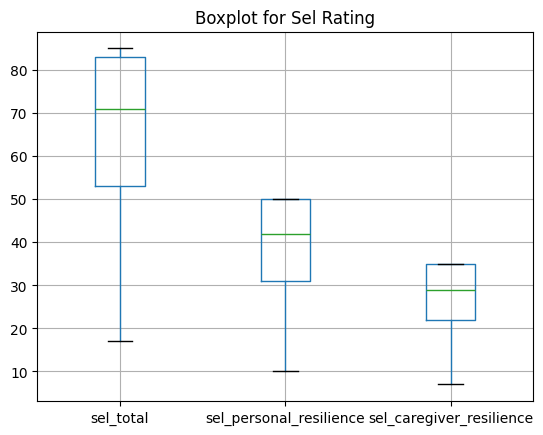

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

columns_to_plot = ['sel_total', 'sel_personal_resilience', 'sel_caregiver_resilience']

# 绘制箱形图
df_sel_five_scoring[columns_to_plot].boxplot()

# 显示图形
plt.title('Boxplot for Sel Rating')
plt.show()